In [1]:

import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential



from tqdm import tqdm


Import data

In [2]:
class_names = ['cat', 'dog']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150,150)

In [3]:
# Load data function
def load_data():

    
    categories = [r'microsoft-catsvsdogs-dataset\train', r'microsoft-catsvsdogs-dataset\test']
    output = []
    
    for category in categories:

        images = []
        labels = []
        
        print("Loading {}".format(category))
        
        # Iterate through the two folders within test and train
        for folder in os.listdir(category):
            label = class_names_label[folder]
            
            # Iterate through each image
            for file in tqdm(os.listdir(os.path.join(category, folder))):
                img_path = os.path.join(os.path.join(category, folder), file)
                
                # Open image. If image passed is empty or None, skip and iterate through next image.
                image = cv2.imread(img_path)
                if(image is not None):
                    
                    # Resize image
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, IMAGE_SIZE)
                
                    # Append image and its label to the output
                    images.append(image)
                    labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        
        output.append((images, labels))
        
    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\Chase\microsoft-catsvsdogs-dataset\train


100%|██████████| 1000/1000 [00:02<00:00, 396.63it/s]


Loading C:\Users\Chase\microsoft-catsvsdogs-dataset\test


100%|██████████| 100/100 [00:00<00:00, 381.25it/s]


Randomize the images for displaying a collection of uploaded images

In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

Display a count of all the uploaed images in both test and train categories, and their current image size

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1995
Number of testing examples: 200
Each image is of size: (150, 150)


For ease of understanding image breakdown, provide a bar graph. For training purposes, if these bars are too imbalanced then data needs to be reviewed.

In [7]:
directory_path_cat = r'C:\Users\Chase\microsoft-catsvsdogs-dataset\train\cat'
directory_path_dog = r'C:\Users\Chase\microsoft-catsvsdogs-dataset\train\dog'

count_cat = 0
count_dog = 0

for path in os.listdir(directory_path_cat):
    if os.path.isfile(os.path.join(directory_path_cat, path)):
        count_cat += 1
        
for path in os.listdir(directory_path_dog):
    if os.path.isfile(os.path.join(directory_path_dog, path)):
        count_dog += 1
        

Text(0.5, 1.0, 'Total images in training files:')

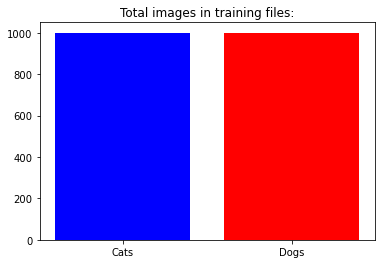

In [8]:
x_axis = ['Cats', 'Dogs']

y_axis = [count_cat, count_dog]

plt.bar(x_axis, y_axis, color = ('blue', 'red'))

plt.title("Total images in training files:")

Now display 25 images to show they are properly uploaded.

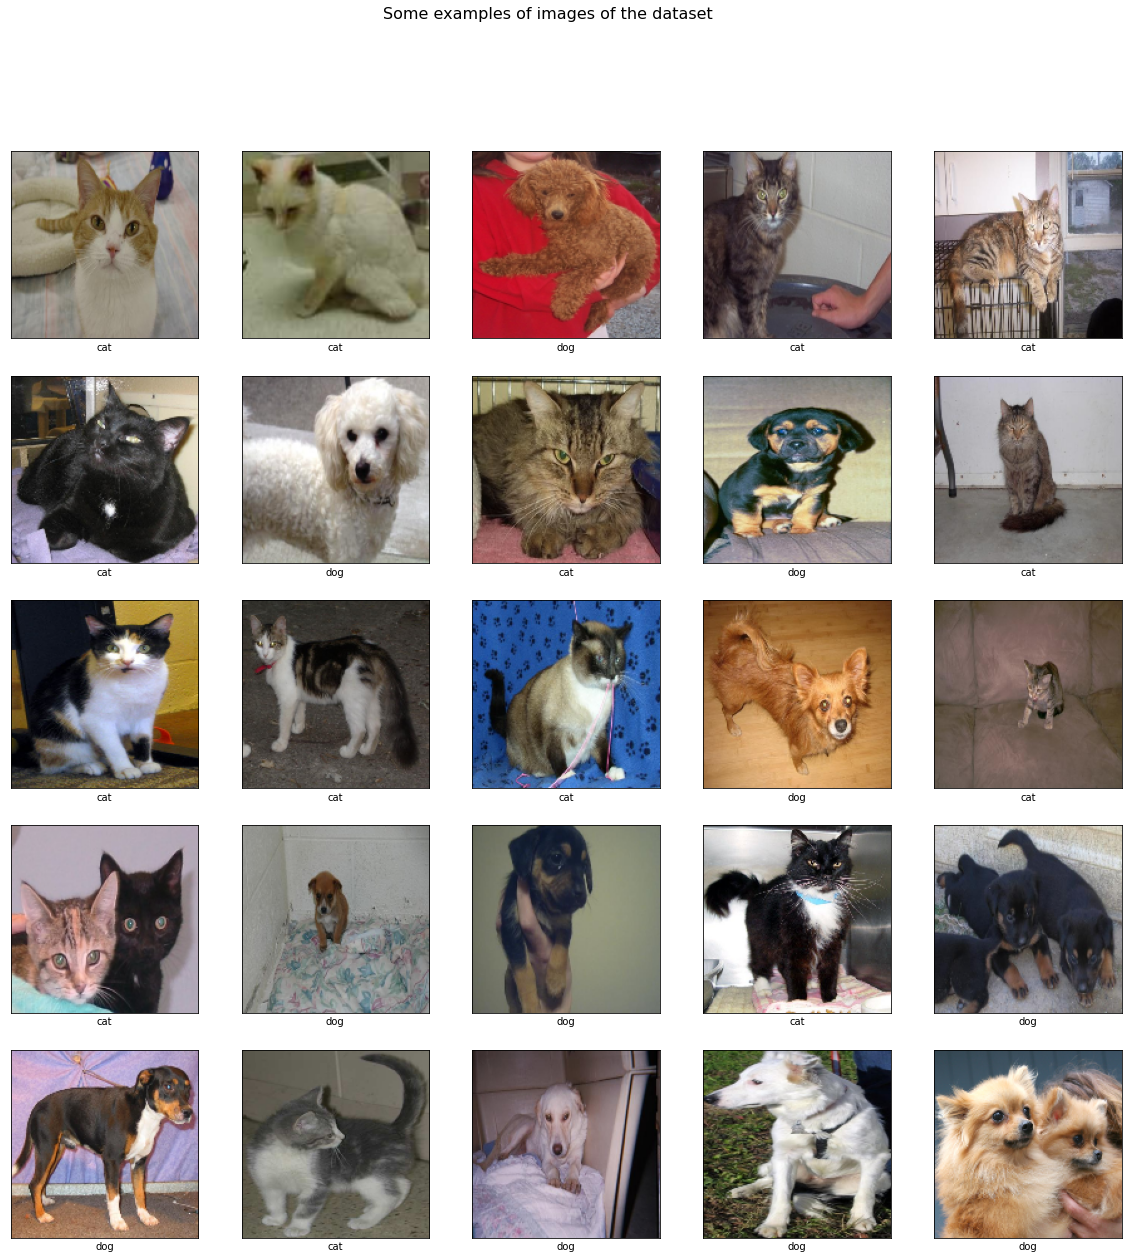

In [9]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].astype(np.uint8))
        plt.xlabel(class_names[labels[i]])
    plt.show()
display_examples(class_names, train_images, train_labels)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Begin training. For additional (or less) training time change the epochs=? to any number you'd like.

In [12]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
13/13 [==============================] - 11s 833ms/step - loss: 416.0934 - accuracy: 0.4969 - val_loss: 1.9318 - val_accuracy: 0.5263
Epoch 2/10
13/13 [==============================] - 10s 804ms/step - loss: 1.1160 - accuracy: 0.5313 - val_loss: 0.8016 - val_accuracy: 0.5414
Epoch 3/10
13/13 [==============================] - 11s 814ms/step - loss: 0.7223 - accuracy: 0.5739 - val_loss: 0.7682 - val_accuracy: 0.5188
Epoch 4/10
13/13 [==============================] - 11s 822ms/step - loss: 0.6062 - accuracy: 0.6754 - val_loss: 0.7162 - val_accuracy: 0.5664
Epoch 5/10
13/13 [==============================] - 11s 824ms/step - loss: 0.5182 - accuracy: 0.7268 - val_loss: 0.6689 - val_accuracy: 0.6516
Epoch 6/10
13/13 [==============================] - 11s 825ms/step - loss: 0.4161 - accuracy: 0.8327 - val_loss: 0.6838 - val_accuracy: 0.6541
Epoch 7/10
13/13 [==============================] - 10s 809ms/step - loss: 0.3239 - accuracy: 0.8634 - val_loss: 0.7198 - val_accuracy: 0.66

Here we now enter in a method to see a breakdown of the change in accuracy over the epochs


In [13]:
def plot_accuracy_loss(history):
    
        fig = plt.figure(figsize=(10,5))
        
        plt.subplot(221)
        plt.plot(history.history['accuracy'], 'bo--', label = "acc")
        plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
        plt.title("train_acc vs val_acc")
        plt.ylabel("accuracy")
        plt.xlabel("epochs")
        plt.legend()
        
        plt.subplot(222)
        plt.plot(history.history['loss'],'bo--', label = 'loss')
        plt.plot(history.history['val_loss'], 'ro--', label = 'val_loss')
        plt.title("train_loss vs val_loss")
        plt.ylabel("loss")
        plt.xlabel("epochs")
              
        plt.legend()
        plt.show()

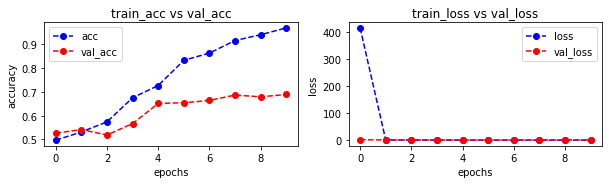

In [14]:
plot_accuracy_loss(history)

Finally we can run another on the test files. We can see that additional training may be needed for the test case to be at the desired accuracy.

In [15]:
test_loss = model.evaluate(test_images, test_labels)

7/7 [==============================] - 0s 42ms/step - loss: 1.2318 - accuracy: 0.6000


In [16]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print(classification_report(test_labels, pred_labels))

7/7 [==============================] - 0s 41ms/step
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       100
           1       0.61      0.57      0.59       100

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200

